Loaded models: 21


C:\Users\NNadi\AppData\Local\Temp\ipykernel_22600\2666516707.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


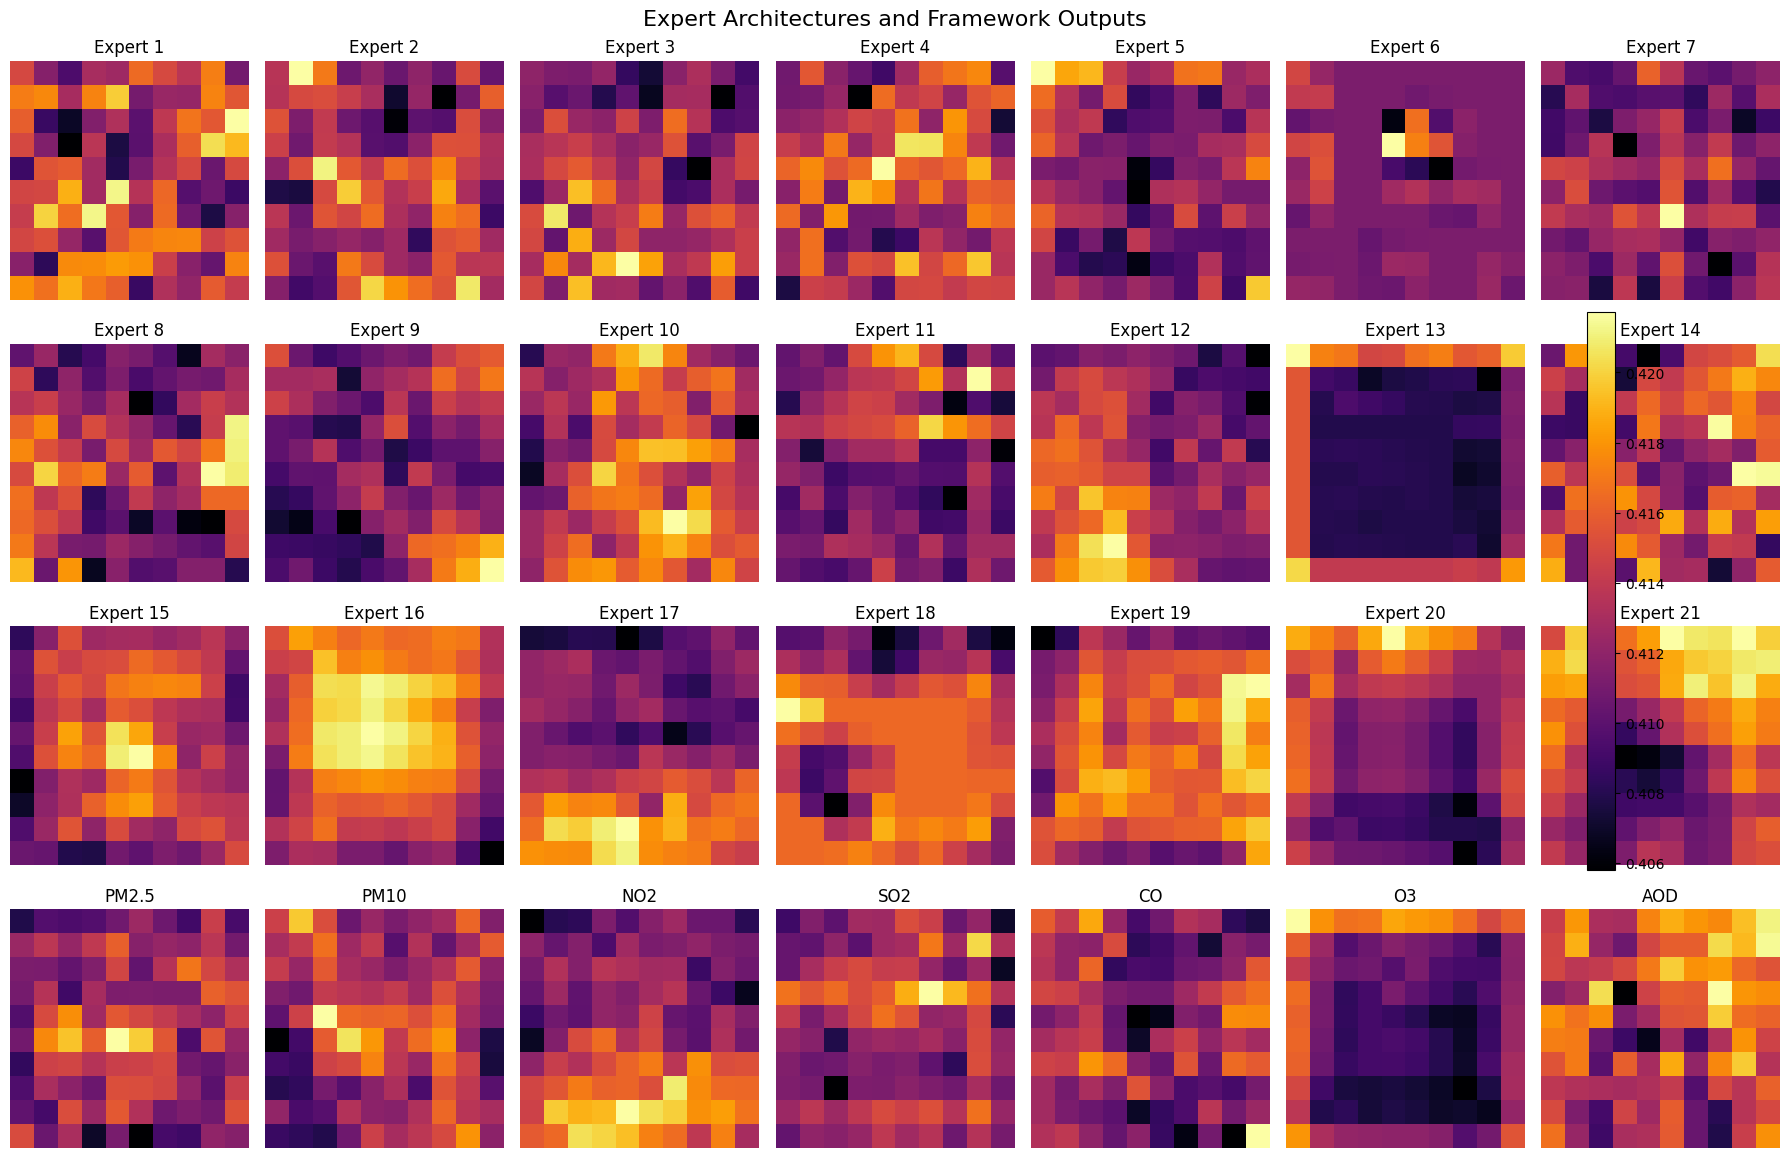

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ===================================================================
# 1. LOAD ALL 21 MODELS
# ===================================================================
models_base = r"C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models"
experts = []

for i in range(1, 22):
    path = fr"{models_base}\expert{i}_output\expert{i}_best_model"
    model = tf.keras.models.load_model(path)
    experts.append(model)

print("Loaded models:", len(experts))

# ===================================================================
# 2. LOAD ONE SAMPLE
# ===================================================================
xtrain_path = r"C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\datasets\X_train.npy"
X_train = np.load(xtrain_path)
X = X_train[0:1]       # shape (1,5,10,10,24)

# ===================================================================
# 3. GET 21 EXPERT HEATMAPS (10×10 each)
# ===================================================================
expert_maps = []

for model in experts:
    raw = model.predict(X, verbose=0)    # (1,10,10,1)
    heat = raw[0, :, :, 0]               # (10×10)
    expert_maps.append(heat)

# ===================================================================
# 4. FRAMEWORK (7 MAPS: pm25, pm10, no2, so2, co, o3, aod)
# ===================================================================
groups = {
    "PM2.5": [1, 8, 15],
    "PM10":  [2, 9, 16],
    "NO2":   [3, 10, 17],
    "SO2":   [4, 11, 18],
    "CO":    [5, 12, 19],
    "O3":    [6, 13, 20],
    "AOD":   [7, 14, 21]
}

framework_maps = []
framework_labels = []

for name, idx_list in groups.items():
    maps = [expert_maps[i-1] for i in idx_list]
    avg_map = np.mean(maps, axis=0)
    framework_maps.append(avg_map)
    framework_labels.append(name)

# ===================================================================
# 5. PLOT 4 ROWS (7 images per row)
# ===================================================================

fig, axes = plt.subplots(4, 7, figsize=(18, 12))
fig.suptitle("Expert Architectures and Framework Outputs", fontsize=16)

# Row 1: Experts 1–7
for i in range(7):
    axes[0, i].imshow(expert_maps[i], cmap='inferno')
    axes[0, i].set_title(f"Expert {i+1}")
    axes[0, i].axis('off')
axes[0, 0].set_ylabel("Architecture 1", fontsize=12)

# Row 2: Experts 8–14
for i in range(7):
    axes[1, i].imshow(expert_maps[7+i], cmap='inferno')
    axes[1, i].set_title(f"Expert {8+i}")
    axes[1, i].axis('off')
axes[1, 0].set_ylabel("Architecture 2", fontsize=12)

# Row 3: Experts 15–21
for i in range(7):
    axes[2, i].imshow(expert_maps[14+i], cmap='inferno')
    axes[2, i].set_title(f"Expert {15+i}")
    axes[2, i].axis('off')
axes[2, 0].set_ylabel("Architecture 3", fontsize=12)

# Row 4: Framework maps
for i in range(7):
    axes[3, i].imshow(framework_maps[i], cmap='inferno')
    axes[3, i].set_title(f"{framework_labels[i]}")
    axes[3, i].axis('off')
axes[3, 0].set_ylabel("Consolidated\nfrom Three Architectures", fontsize=11)

# ===================================================================
# SHARED COLORBAR
# ===================================================================

# get last image as reference
im = axes[3, 6].imshow(framework_maps[-1], cmap='inferno')
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)

plt.tight_layout()
plt.show()


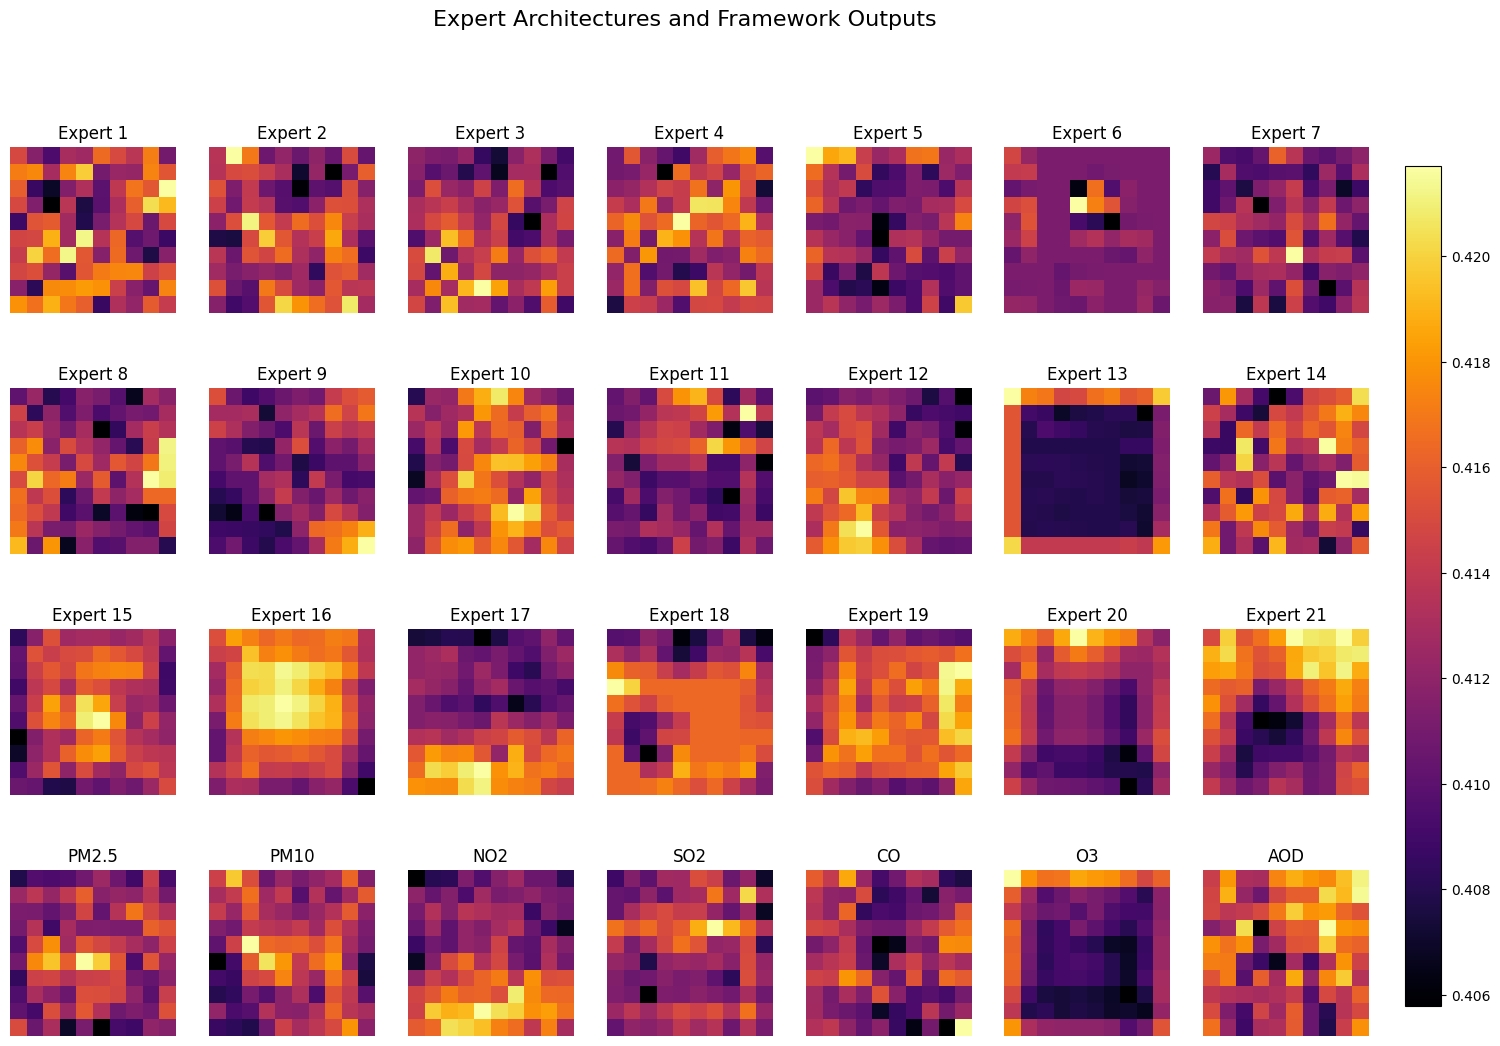

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# expert_maps: list of 21 arrays (10x10)
# framework_maps: list of 7 arrays (10x10)
# framework_labels: list of pollutant names

fig, axes = plt.subplots(4, 7, figsize=(18, 12))
fig.suptitle("Expert Architectures and Framework Outputs", fontsize=16)

# -------------------------------
# ROW 1 — Architecture 1 (Experts 1–7)
# -------------------------------
for i in range(7):
    axes[0, i].imshow(expert_maps[i], cmap='inferno')
    axes[0, i].set_title(f"Expert {i+1}")
    axes[0, i].axis('off')
axes[0, 0].set_ylabel("Architecture 1", fontsize=12)

# -------------------------------
# ROW 2 — Architecture 2 (Experts 8–14)
# -------------------------------
for i in range(7):
    axes[1, i].imshow(expert_maps[7+i], cmap='inferno')
    axes[1, i].set_title(f"Expert {8+i}")
    axes[1, i].axis('off')
axes[1, 0].set_ylabel("Architecture 2", fontsize=12)

# -------------------------------
# ROW 3 — Architecture 3 (Experts 15–21)
# -------------------------------
for i in range(7):
    axes[2, i].imshow(expert_maps[14+i], cmap='inferno')
    axes[2, i].set_title(f"Expert {15+i}")
    axes[2, i].axis('off')
axes[2, 0].set_ylabel("Architecture 3", fontsize=12)

# -------------------------------
# ROW 4 — Framework heatmaps (PM2.5…AOD)
# -------------------------------
for i in range(7):
    axes[3, i].imshow(framework_maps[i], cmap='inferno')
    axes[3, i].set_title(framework_labels[i])
    axes[3, i].axis('off')

axes[3, 0].set_ylabel("Consolidated\nfrom Three Architectures", fontsize=11)

# -------------------------------
# SHARED COLORBAR (proper placement, no overlap)
# -------------------------------
# use last image for color scaling
im = axes[3, 6].imshow(framework_maps[-1], cmap='inferno')

# add space for colorbar
fig.subplots_adjust(right=0.88)

# colorbar axis: [left, bottom, width, height]
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()
